In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# **OBJECTIVES**
## - which language do most people watch and their gross
## - which studio produces the heighest gross outside the countries they are
## - does popularity affect gross

### - Load and working on the first dataset
### - Our first Dataset will be named budget from the csv file movie budget.

In [2]:
budget = pd.read_csv('tn.movie_budgets.csv.gz')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [5]:
budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [6]:
budget.isnull().sum()

,0
id,0
release_date,0
movie,0
production_budget,0
domestic_gross,0
worldwide_gross,0


No null values

### Second data set is movies from the movies csv file.

In [7]:
movies = pd.read_csv('tmdb.movies.csv.gz')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [10]:
movies.isnull().sum()

,0
Unnamed: 0,0
genre_ids,0
id,0
original_language,0
original_title,0
popularity,0
release_date,0
title,0
vote_average,0
vote_count,0


No Null Values

### Third dataset is from gross csv

In [11]:
movies_gross = pd.read_csv('bom.movie_gross.csv.gz')
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
movies_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [14]:
movies_gross.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


### Some non values in the 'studio', 'domestic gross' and 'foreign gross' columns, lets fix it before proceeding

In [30]:
# fill non values in studio with unkown
movies_gross['studio'] = movies_gross['studio'].fillna('Unknown Studio')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000,2010
1,alice in wonderland (2010),BV,334200000.0,691300000,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000,2010
3,inception,WB,292600000.0,535700000,2010
4,shrek forever after,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,the quake,Magn.,6200.0,1000,2018
3383,edward ii (2018 re-release),FM,4800.0,1000,2018
3384,el pacto,Sony,2500.0,1000,2018
3385,the swan,Synergetic,2400.0,1000,2018


In [16]:
# fill domestic gross with 0 as only 28 are unaacounted for
movies_gross['domestic_gross'] = movies_gross['domestic_gross'].fillna(0)
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [17]:
# accounts for 38 so i put the lowest number instead of zero
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].fillna(1000)
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1000,2018
3383,Edward II (2018 re-release),FM,4800.0,1000,2018
3384,El Pacto,Sony,2500.0,1000,2018
3385,The Swan,Synergetic,2400.0,1000,2018


In [18]:
movies_gross.isnull().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


### Cleaned, now we merge all data sets

In [19]:
# nomarlize title and year columns
movies_gross['title'] = movies_gross['title'].str.lower().str.strip()
movies['title'] = movies['title'].str.lower().str.strip()

# merge gross nad movies
merged = pd.merge(
    movies_gross,
    movies,
    left_on=['title'],
    right_on=['title'],
    how='inner'
)

# select and frame desired column
merged = merged[[
    'genre_ids',
    'id',
    'title',
    'domestic_gross',
    'original_language',
    'studio',
    'original_title',
    'year',
    'foreign_gross',
    'release_date',
    'popularity',
    'vote_average',
    'vote_count'
]]


print('Merged shape', merged.shape)
merged.head()

Merged shape (2790, 13)


,genre_ids,id,title,domestic_gross,original_language,studio,original_title,year,foreign_gross,release_date,popularity,vote_average,vote_count
0,"[16, 10751, 35]",10193,toy story 3,415000000.0,en,BV,Toy Story 3,2010,652000000,2010-06-17,24.445,7.7,8340
1,"[28, 878, 12]",27205,inception,292600000.0,en,WB,Inception,2010,535700000,2010-07-16,27.920,8.3,22186
2,"[35, 12, 14, 16, 10751]",10192,shrek forever after,238700000.0,en,P/DW,Shrek Forever After,2010,513900000,2010-05-16,15.041,6.1,3843
3,"[12, 14, 18, 10749]",24021,the twilight saga: eclipse,300500000.0,en,Sum.,The Twilight Saga: Eclipse,2010,398000000,2010-06-23,20.340,6.0,4909
4,"[12, 28, 878]",10138,iron man 2,312400000.0,en,Par.,Iron Man 2,2010,311500000,2010-05-07,28.515,6.8,12368


In [20]:
merged.isnull().sum()

,0
genre_ids,0
id,0
title,0
domestic_gross,0
original_language,0
studio,0
original_title,0
year,0
foreign_gross,0
release_date,0


In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          2790 non-null   object 
 1   id                 2790 non-null   int64  
 2   title              2790 non-null   object 
 3   domestic_gross     2790 non-null   float64
 4   original_language  2790 non-null   object 
 5   studio             2790 non-null   object 
 6   original_title     2790 non-null   object 
 7   year               2790 non-null   int64  
 8   foreign_gross      2790 non-null   object 
 9   release_date       2790 non-null   object 
 10  popularity         2790 non-null   float64
 11  vote_average       2790 non-null   float64
 12  vote_count         2790 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 283.5+ KB


In [22]:
merged['title'] = merged['title'].str.lower().str.strip()
budget['movie'] = budget['movie'].str.lower().str.strip()

final_merged = pd.merge(
    merged,
    budget[['movie', 'production_budget', 'worldwide_gross']],
    left_on='title',
    right_on='movie',
    how='left'
)
final_merged = final_merged[[
    'id',
    'title',
    'original_title',
    'original_language',
    'studio',
    'release_date',
    'production_budget',
    'domestic_gross',
    'foreign_gross',
    'worldwide_gross',
    'popularity',
    'vote_count',
    'vote_average'
]]

print('Merged shape', final_merged.shape)
final_merged.head()

Merged shape (2807, 13)


,id,title,original_title,original_language,studio,release_date,production_budget,domestic_gross,foreign_gross,worldwide_gross,popularity,vote_count,vote_average
0,10193,toy story 3,Toy Story 3,en,BV,2010-06-17,"$200,000,000",415000000.0,652000000,"$1,068,879,522",24.445,8340,7.7
1,27205,inception,Inception,en,WB,2010-07-16,"$160,000,000",292600000.0,535700000,"$835,524,642",27.920,22186,8.3
2,10192,shrek forever after,Shrek Forever After,en,P/DW,2010-05-16,"$165,000,000",238700000.0,513900000,"$756,244,673",15.041,3843,6.1
3,24021,the twilight saga: eclipse,The Twilight Saga: Eclipse,en,Sum.,2010-06-23,"$68,000,000",300500000.0,398000000,"$706,102,828",20.340,4909,6.0
4,10138,iron man 2,Iron Man 2,en,Par.,2010-05-07,"$170,000,000",312400000.0,311500000,"$621,156,389",28.515,12368,6.8


In [23]:
# lets rename
movie_data = final_merged.copy()

In [24]:
movie_data.head(6)

,id,title,original_title,original_language,studio,release_date,production_budget,domestic_gross,foreign_gross,worldwide_gross,popularity,vote_count,vote_average
0,10193,toy story 3,Toy Story 3,en,BV,2010-06-17,"$200,000,000",415000000.0,652000000,"$1,068,879,522",24.445,8340,7.7
1,27205,inception,Inception,en,WB,2010-07-16,"$160,000,000",292600000.0,535700000,"$835,524,642",27.920,22186,8.3
2,10192,shrek forever after,Shrek Forever After,en,P/DW,2010-05-16,"$165,000,000",238700000.0,513900000,"$756,244,673",15.041,3843,6.1
3,24021,the twilight saga: eclipse,The Twilight Saga: Eclipse,en,Sum.,2010-06-23,"$68,000,000",300500000.0,398000000,"$706,102,828",20.340,4909,6.0
4,10138,iron man 2,Iron Man 2,en,Par.,2010-05-07,"$170,000,000",312400000.0,311500000,"$621,156,389",28.515,12368,6.8
5,38757,tangled,Tangled,en,BV,2010-11-24,"$260,000,000",200800000.0,391000000,"$586,477,240",21.511,6407,7.5


null values occured so i cleaned the data again

In [25]:
# remove commas and dollar sign
movie_data['worldwide_gross'] = movie_data['worldwide_gross'].astype(str).str.replace('[\$,]', '', regex=True)
movie_data['production_budget'] = movie_data['production_budget'].astype(str).str.replace('[\$,]', '', regex=True)
movie_data['foreign_gross'] = movie_data['foreign_gross'].astype(str).str.replace('[\$,]','', regex=True)

# Replace 'nan' strings with 0 before converting to numeric
movie_data['worldwide_gross'] = movie_data['worldwide_gross'].replace('nan', '0')
movie_data['production_budget'] = movie_data['production_budget'].replace('nan', '0')

# convert to float
movie_data['worldwide_gross'] = pd.to_numeric(movie_data['worldwide_gross'])
movie_data['production_budget'] = pd.to_numeric(movie_data['production_budget'])
movie_data['foreign_gross'] = pd.to_numeric(movie_data['foreign_gross'])

# fill NaN values with 0
movie_data['worldwide_gross'] = movie_data['worldwide_gross'].fillna(0)
movie_data['production_budget'] = movie_data['production_budget'].fillna(0)


# convert to integer
movie_data['worldwide_gross'] = movie_data['worldwide_gross'].astype(int)
movie_data['production_budget'] = movie_data['production_budget'].astype(int)
movie_data['foreign_gross'] = movie_data['foreign_gross'].astype(int)

movie_data.head(6)

,id,title,original_title,original_language,studio,release_date,production_budget,domestic_gross,foreign_gross,worldwide_gross,popularity,vote_count,vote_average
0,10193,toy story 3,Toy Story 3,en,BV,2010-06-17,200000000,415000000.0,652000000,1068879522,24.445,8340,7.7
1,27205,inception,Inception,en,WB,2010-07-16,160000000,292600000.0,535700000,835524642,27.920,22186,8.3
2,10192,shrek forever after,Shrek Forever After,en,P/DW,2010-05-16,165000000,238700000.0,513900000,756244673,15.041,3843,6.1
3,24021,the twilight saga: eclipse,The Twilight Saga: Eclipse,en,Sum.,2010-06-23,68000000,300500000.0,398000000,706102828,20.340,4909,6.0
4,10138,iron man 2,Iron Man 2,en,Par.,2010-05-07,170000000,312400000.0,311500000,621156389,28.515,12368,6.8
5,38757,tangled,Tangled,en,BV,2010-11-24,260000000,200800000.0,391000000,586477240,21.511,6407,7.5


In [26]:
movie_data.isnull().sum()

,0
id,0
title,0
original_title,0
original_language,0
studio,0
release_date,0
production_budget,0
domestic_gross,0
foreign_gross,0
worldwide_gross,0


# Visualization

## original language vs worldwide gross

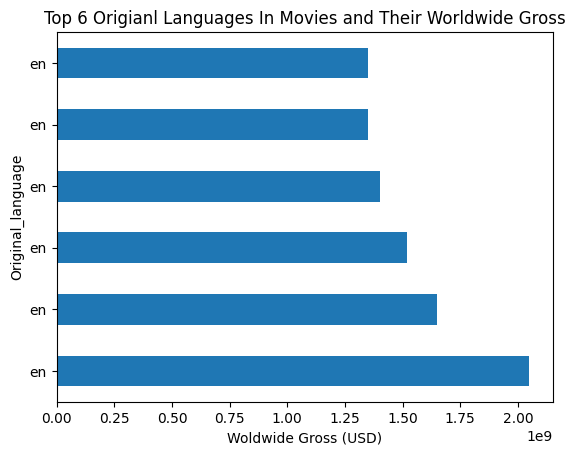

In [27]:
# top 6 oringinal languages with their worldwide gross
outcome = movie_data[['original_language', 'worldwide_gross']].sort_values(by='worldwide_gross', ascending=False).head(6)


# plot horizontal bar chart
plt.figsize=(12, 6)
outcome.plot(kind='barh', x='original_language', y='worldwide_gross', title='Top 6 Origianl Languages In Movies and Their Worldwide Gross', legend=False)
plt.xlabel('Woldwide Gross (USD)') # scaled to power 9
plt.ylabel('Original_language')
plt.show()

movies in english has the most gross worldwide

## studio and their gross

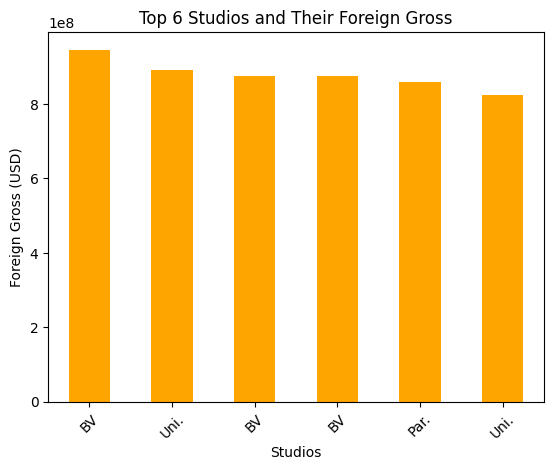

In [31]:
studio_gross = movie_data[['studio', 'foreign_gross']].sort_values(by='foreign_gross', ascending=False).head(6)

# plot bar chart
plt.figsize=(12, 6)
studio_gross.plot(kind='bar', x='studio', y='foreign_gross', title='Top 6 Studios and Their Foreign Gross', color='orange', legend=False)
plt.xlabel('Studios')
plt.ylabel('Foreign Gross (USD)') # scaled to the power 8
plt.xticks(rotation=45)
plt.show()

BV studio has the heighest performing foreign gross followed by Universal studios then paramount pictures.

##popularity vs gross worldwide

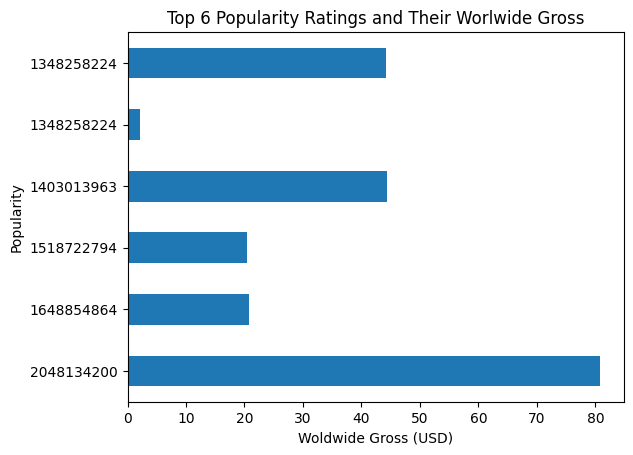

In [32]:
# top 6 oringinal languages with their worldwide gross
popularity = movie_data[['popularity', 'worldwide_gross']].sort_values(by='worldwide_gross', ascending=False).head(6)


# plot horizontal bar chart
plt.figsize=(12, 6)
popularity.plot(kind='barh', x='worldwide_gross', y='popularity', title='Top 6 Popularity Ratings and Their Worlwide Gross', legend=False)
plt.xlabel('Woldwide Gross (USD)')
plt.ylabel('Popularity')
plt.show()

The higher the popularity the more the movie makes


# **RECOMMENDATIONS**
- Microsoft should produce movies in English as they are the most watched, voice overs and translations of english are an additional
- BV, Universal studios and Paramount pictures have the heighest gross in th market outside their locations showing they know how to market their movies, Microsoft has three options there which they can choose
- Popularity brings in numbers in terms of viewership which can be tranlated into gross, as show the more popular a movie the heigher the gross, Microsoft should pay a visit to the three recommended studios as I mendtioned they know how to market